In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [3]:
#3 rows deleted:
#20484	,RegEx used to extract tokens from an ASCIIMath expression"	11		1	0	0	https://i.stack.imgur.com/6VcaB.png									0	1		0	0	0	0	0	1	0	0	0	1	1	0	0	0	0	0
#71350	,Bootstrap modal wont trigger on mobile"	443	Lake Mary, FL, United States	85	165	11	https://i.stack.imgur.com/TLzJW.png?s=128&g=1									0	1		0	0	0	0	0	3	0	0	0	1	1	0	0	0	0	0
#60036	<p>from group ""Value"" i can get the value of hour and it gives output as 1	3	2	4	5	6 and so on for each generator name but since no of hour is common to all i need that i get it only once that is i should get 1	2	5	6 only once</p>							0	1		0	0	0	0	0	1	0	0	0	1	1	0	1	0	0	0

openCloseData=pd.read_csv("openCloseData9.csv",index_col=False)
openCloseData.head()

,Unnamed: 0,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [4]:
print(openCloseData.head())

   Unnamed: 0                                            AboutMe  \
0           0                                                NaN   
1           1                                                NaN   
2           2  <p>Currently a software developer at HiQ Finla...   
3           3  <p>Love the computer science &amp; technology ...   
4           4                                                NaN   

                                                Body  Comment  Downvotes  \
0  <p>Please someone explain complete step by ste...      100          0   
1  <p>I've used SFST language for my project on N...      100          0   
2  <p>The following JSON is returned from SharePo...      100       2413   
3  <p>What's the benifit of allocating a chunk of...      100          3   
4  <p>I'm using an S3 bucket as the origin or a C...      100         77   

            Location    PostId  \
0                NaN  32203002   
1                NaN  31961877   
2  Helsinki, Finland  22080350  

In [5]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)
#Actually 4 rows are removed

(159996, 47)
(159996, 46)


In [6]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [7]:
#https://stackoverflow.com/questions/33961028/remove-non-numeric-rows-in-one-column-with-pandas
print(openCloseData.shape)
#openCloseData[openCloseData.Reputation.apply(lambda x: x.isnumeric())]
#print(openCloseData.dtypes)
#print(openCloseData.shape)

(159996, 46)


In [30]:
#openCloseData['codeTextRatio']=openCloseData['codeLength']/(openCloseData['bodyWordCount']+1)

### ADDING MORE FEATURES

In [31]:
# tagWeightData=pd.read_csv("tagWeightData.csv")
# print(tagWeightData.head())

In [32]:
# import re
# idx=0
# def calculateTagWeight(tags):
#     forClosed=re.findall('<(.*?)>',tags)
#     forOpen=tags.split('|')
#     #print(forClosed)
#     #print(forOpen)
#     if(len(forClosed) ):  #if we pass tags for open in close it won't work, but vice versa will work hence 
#         # this particular order of if-else 
#         tagList=forClosed
#     elif(len(forOpen) ):
#         tagList=forOpen
#     #print(tagList)
#     wt=0
# #     for t in tagList:
# #         #print(t)
# #         try:
            
# #         except:
# #             print(t)
# #         print(wt)
# #     print("check")
# #     if(idx%1000==0)print(idx)
# #     idx+=1
#     try:
#         for t in tagList:
#             wt=wt+tagWeightData[tagWeightData['TagName']==t][['tagWeight']].values[0]
#     except:
#         #print(tagList)
#         pass
#     return wt

In [33]:
# import time
# tic=time.time()
# openCloseData['tagWeightSum']=openCloseData['Tags'].apply(calculateTagWeight) #tagClosingWeightSum
# toc=time.time()
# print(str((toc-tic)/60)+"mins")

In [8]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [35]:
# openCloseData['tagWeightSum'][0][0]

In [36]:
# openCloseData.head()

In [37]:
# def getInitialEle(ar):
#     #print(type(ar))
#     return float(ar)

# openCloseData['tagWeightSum']=openCloseData['tagWeightSum'].apply(getInitialEle)
# print(openCloseData.head())

In [38]:
# openCloseData.to_csv("openCloseData[35 cols].csv")

In [9]:
X = openCloseData.loc[:,['Downvotes', 
       'Reputation', 'SOUrlCount',
       'Upvotes', 'Views',
       'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'lowerUpperRatio',
       'numAns', 'numQues',
       'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled'] ]


X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(159996, 29)
<class 'pandas.core.frame.DataFrame'>


In [10]:
X.head()

,Downvotes,Reputation,SOUrlCount,Upvotes,Views,bodyWordCount,closed,codeLength,colemanLiauIndex,countOfInterrogativeSent,...,sentenceCount,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled
0,0,6,0,0,8,17,0,0,9.74,0,...,1,0,0,6,0.0,2,-110.462467,33,0,1
1,0,6,0,0,8,41,0,0,18.39,1,...,9,3,0,27,0.0,4,-157.135019,25,2,1
2,2413,33857,0,1574,2438,70,0,18555,15.11,1,...,2,0,0,25,0.0,3,-279.862500,134,0,4
3,3,1470,0,362,312,25,0,0,13.41,3,...,3,0,0,10,0.0,5,-234.970000,78,0,3
4,77,10992,0,269,667,70,0,0,8.70,1,...,4,2,0,35,10.7,4,-527.002535,59,0,0


In [11]:
X[np.isinf(X).any(axis=1)]

,Downvotes,Reputation,SOUrlCount,Upvotes,Views,bodyWordCount,closed,codeLength,colemanLiauIndex,countOfInterrogativeSent,...,sentenceCount,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled


In [12]:
y = X.closed
X.drop(['closed'],inplace=True,axis=1)
print(y.shape)

(159996,)


### MEAN NORMALIZATION of X

In [13]:
X.columns

Index(['Downvotes', 'Reputation', 'SOUrlCount', 'Upvotes', 'Views',
       'bodyWordCount', 'codeLength', 'colemanLiauIndex',
       'countOfInterrogativeSent', 'daleChallReadabilityScore',
       'experienceInTime', 'firstLineLength', 'fleschReadingEase',
       'gunningFog', 'lowerUpperRatio', 'numAns', 'numQues',
       'punctuationCount', 'sentenceCount', 'sentencesStartWithICount',
       'sentencesStartWithYouCount', 'shortWordCount', 'smogIndex', 'tagCount',
       'tagWeightSum', 'titleLengthInChars', 'urlCount', 'userProfileFilled'],
      dtype='object')

In [14]:
print(type(X))
print(X.head())

<class 'pandas.core.frame.DataFrame'>
   Downvotes  Reputation  SOUrlCount  Upvotes  Views  bodyWordCount  \
0          0           6           0        0      8             17   
1          0           6           0        0      8             41   
2       2413       33857           0     1574   2438             70   
3          3        1470           0      362    312             25   
4         77       10992           0      269    667             70   

   codeLength  colemanLiauIndex  countOfInterrogativeSent  \
0           0              9.74                         0   
1           0             18.39                         1   
2       18555             15.11                         1   
3           0             13.41                         3   
4           0              8.70                         1   

   daleChallReadabilityScore        ...          sentenceCount  \
0                       7.27        ...                      1   
1                       9.66        

In [15]:
# x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))
print(scaler.mean_)
print(scaler.var_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Downvotes', 'Reputation', 'SOUrlCount', 'Upvotes', 'Views',
       'bodyWordCount', 'codeLength', 'colemanLiauIndex',
       'countOfInterrogativeSent', 'daleChallReadabilityScore',
       'experienceInTime', 'firstLineLength', 'fleschReadingEase',
       'gunningFog', 'lowerUpperRatio', 'numAns', 'numQues',
       'punctuationCount', 'sentenceCount', 'sentencesStartWithICount',
       'sentencesStartWithYouCount', 'shortWordCount', 'smogIndex', 'tagCount',
       'tagWeightSum', 'titleLengthInChars', 'urlCount', 'userProfileFilled'])

StandardScaler(copy=True, with_mean=True, with_std=True)
[  2.18902723e+01   2.01807416e+03   1.54941374e-02   2.26216980e+02
   3.01059583e+02   8.53872034e+01   5.68528057e+02   9.82247931e+00
   1.19541739e+00   7.71907479e+00   5.10066908e+02   9.98289770e+01
   5.42152991e+01   1.89378949e+01   2.99731747e+01   3.25230693e+01
   4.77225618e+01   4.33703530e+01   5.96079902e+00   2.02549439e+00
   8.63771594e-03   4.09886685e+01   5.76047464e+00   2.90577889e+00
  -2.44966593e+02   5.12481187e+01   1.91942299e-01   1.54041351e+00]
[  1.11587341e+05   1.17173655e+08   2.93294209e-02   6.03714126e+05
   2.94724961e+06   4.70156550e+03   2.07884824e+06   3.34948687e+01
   4.61051576e+00   3.37276468e+00   3.42615432e+05   8.75204965e+03
   1.37349155e+03   1.23125524e+02   6.64480756e+02   3.60008314e+04
   1.52441460e+04   2.03530533e+04   1.22872198e+02   2.81215161e+00
   1.12006717e-02   1.21652922e+03   3.21043352e+01   1.50461647e+00
   4.59393389e+04   4.03492388e+02   8.664557

In [16]:
print(type(X))
print(X.head())

<class 'pandas.core.frame.DataFrame'>
   Downvotes  Reputation  SOUrlCount   Upvotes     Views  bodyWordCount  \
0  -0.065531   -0.185878   -0.090472 -0.291145 -0.170705      -0.997364   
1  -0.065531   -0.185878   -0.090472 -0.291145 -0.170705      -0.647346   
2   7.158006    2.941328   -0.090472  1.734620  1.244755      -0.224408   
3  -0.056550   -0.050632   -0.090472  0.174755  0.006373      -0.880691   
4   0.164976    0.829025   -0.090472  0.055062  0.213158      -0.224408   

   codeLength  colemanLiauIndex  countOfInterrogativeSent  \
0   -0.394312         -0.014251                 -0.556730   
1   -0.394312          1.480356                 -0.091010   
2   12.474829          0.913614                 -0.091010   
3   -0.394312          0.619877                  0.840431   
4   -0.394312         -0.193950                 -0.091010   

   daleChallReadabilityScore        ...          sentenceCount  \
0                  -0.244526        ...              -0.447533   
1           

### Conduct Principal Component Analysis

In [47]:
# print('Original number of features:', X.shape[1])
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.99)
# X = pca.fit_transform(X)
# print('Reduced number of features:', X.shape[1])
# print(type(X))
# X = pd.DataFrame(X)

In [16]:
X.head()

,Downvotes,Reputation,SOUrlCount,Upvotes,Views,bodyWordCount,codeLength,colemanLiauIndex,countOfInterrogativeSent,daleChallReadabilityScore,...,sentenceCount,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled
0,-0.065531,-0.185878,-0.090472,-0.291145,-0.170705,-0.997364,-0.394312,-0.014251,-0.556730,-0.244526,...,-0.447533,-1.207846,-0.081616,-1.003151,-1.016662,-0.738430,0.627543,-0.908449,-0.206204,-0.486306
1,-0.065531,-0.185878,-0.090472,-0.291145,-0.170705,-0.647346,-0.394312,1.480356,-0.091010,1.056856,...,0.274178,0.581119,-0.081616,-0.401065,-1.016662,0.892056,0.409787,-1.306714,1.942402,-0.486306
2,7.158006,2.941328,-0.090472,1.734620,1.244755,-0.224408,12.474829,0.913614,-0.091010,1.759276,...,-0.357319,-1.207846,-0.081616,-0.458407,-1.016662,0.076813,-0.162810,4.119649,-0.206204,2.213327
3,-0.056550,-0.050632,-0.090472,0.174755,0.006373,-0.880691,-0.394312,0.619877,0.840431,0.517790,...,-0.267105,-1.207846,-0.081616,-0.888468,-1.016662,1.707299,0.046640,1.331793,-0.206204,1.313449
4,0.164976,0.829025,-0.090472,0.055062,0.213158,-0.224408,-0.394312,-0.193950,-0.091010,-0.032167,...,-0.176891,-0.015203,-0.081616,-0.171699,0.871773,0.892056,-1.315867,0.385913,-0.206204,-1.386184


#### Train/Test Split  

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(111997, 28)
(111997,)
(47999, 28)
(47999,)


In [18]:
X_test.to_csv("test.csv")
y_test.to_csv("actual.csv")

In [19]:
X_train.head()

,Downvotes,Reputation,SOUrlCount,Upvotes,Views,bodyWordCount,codeLength,colemanLiauIndex,countOfInterrogativeSent,daleChallReadabilityScore,...,sentenceCount,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled
29416,-0.065531,-0.186063,-0.090472,-0.291145,-0.168376,-0.136904,2.121950,-0.993953,-0.091010,-0.745477,...,-0.086677,-0.611525,-0.081616,0.143679,0.695284,1.707299,-0.265550,-1.505846,-0.206204,-0.486306
58063,-0.065531,-0.186340,-0.090472,-0.291145,-0.175365,-0.414001,-0.385296,-0.375376,-0.556730,-0.179185,...,-0.176891,-0.015203,-0.081616,-0.515748,0.659986,0.076813,-0.479731,-0.012352,-0.206204,-0.486306
62206,-0.059543,-0.170266,-0.090472,-0.249961,-0.166046,3.567450,0.739670,1.551198,-0.556730,0.261869,...,5.687009,1.177441,-0.081616,3.154105,1.224751,0.892056,-0.017494,-1.207148,-0.206204,-0.486306
14790,-0.065531,-0.182922,-0.090472,-0.273127,-0.170123,-0.078567,0.218801,-0.342546,-0.556730,-0.429660,...,-0.357319,-0.611525,-0.081616,-0.200370,1.277698,1.707299,-0.384663,-0.958232,-0.206204,-0.486306
152752,-0.065531,-0.182737,-0.090472,-0.284710,-0.168376,0.621468,-0.394312,0.498926,0.374711,0.888057,...,0.003536,-0.015203,-0.081616,0.430386,1.507134,1.707299,-0.231941,-0.161702,-0.206204,1.313449


### LOGISTIC REGRESSION

In [20]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_pred=logreg.predict(X_test)
print(y_pred.shape)

(47999,)


In [22]:
#Accuracy
np.mean(y_pred==y_test)
#26 columns with Scaling: 0.8864976353674034

0.89043521740036247

In [23]:
#https://scikit-learn.org/stable/modules/model_persistence.html
#EXPORTING RANDOM FOREST
from joblib import dump, load
dump(logreg, 'logreg1.joblib') 

['logreg1.joblib']

In [24]:
print(classification_report(y_test,y_pred) )
print("Precision: "+str(precision_score(y_test, y_pred, average='macro')) )
print("Recall: "+str(recall_score(y_test, y_pred, average='macro')) )
print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
print(precision_recall_fscore_support(y_test, y_pred, average='macro') )
# Precision, recall, fscore, support in order

#26 cols with Scaling:
# Precision: 0.8873913633946493
# Recall: 0.8873865140134614
# F1 Score:0.8873725937122617

# precision    recall  f1-score   support

#           0       0.89      0.88      0.89     24085
#           1       0.88      0.89      0.89     23914

# avg / total       0.89      0.89      0.89     47999

# Precision: 0.8865374593942957
# Recall: 0.886516977164158
# F1 Score:0.8864970500441661
# (0.8865374593942957, 0.886516977164158, 0.8864970500441661, None)

             precision    recall  f1-score   support

          0       0.89      0.89      0.89     23916
          1       0.89      0.89      0.89     24083

avg / total       0.89      0.89      0.89     47999

Precision: 0.890446383844
Recall: 0.890425990059
F1 Score:0.890431594644
(0.89044638384446528, 0.89042599005861822, 0.89043159464401378, None)


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)

In [26]:
val_score = cross_val_score(logreg,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

[ 0.8213125   0.8192131   0.89177787  0.84758899  0.74483578]


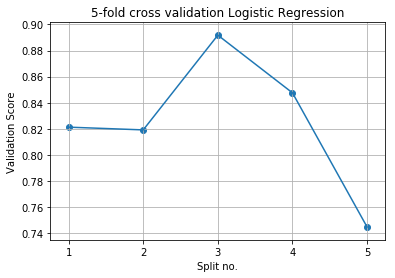

In [28]:
print(val_score)
import matplotlib.pyplot as plt

plt.figure()

plt.plot(range(1, len(val_score) + 1), val_score)
plt.scatter(range(1, len(val_score) + 1), val_score)
plt.title('5-fold cross validation Logistic Regression')
plt.xlabel('Split no.')
plt.ylabel('Validation Score')
plt.xticks(range(1, len(val_score) + 1))
plt.grid(True)

plt.show()

In [29]:
print(confusion_matrix(y_test, y_pred))

[[21232  2684]
 [ 2575 21508]]


In [30]:
y_train_pred = logreg.predict(X_train)

In [31]:
print('Training Accuracy: ', np.mean(y_train == y_train_pred))

Training Accuracy:  0.888666660714


### LASSO REGULARIZATION

In [32]:
#lambdas=list(range(1,50,1))
lambdas=[0.01,0.1,1,10,100]
print(lambdas)
for l in lambdas:
    print(l)
    lassoLogReg=LogisticRegression(penalty="l1",C=1/l)
    lassoLogReg.fit(X_train,y_train)
    y_pred=lassoLogReg.predict(X_test)
    y_train_pred=lassoLogReg.predict(X_train)
    #print(y_pred.shape)
    #Accuracy
    print("lambda="+str(l)+" c="+str(1/l)+"Test Accuracy:"+str(np.mean(y_pred==y_test)))
    print('Train Accuracy: ', np.mean(y_train_pred == y_train))
    print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
#for 23 features: highest accuracy obt was for lambda=650 c=0.0015384615384615385 Accuracy:0.8463926331798579
#for 24 features: highest accuracy obt was for lambda=500 c=0.002 Accuracy:0.8551636492426925
#if we increase lambda very much then too accuracy will reduce because of underfitting

#After scaling:
#29 features: 


[0.01, 0.1, 1, 10, 100]
0.01
lambda=0.01 c=100.0Test Accuracy:0.890560220005
Train Accuracy:  0.888568443798
F1 Score:0.89055622495
0.1
lambda=0.1 c=10.0Test Accuracy:0.890560220005
Train Accuracy:  0.888568443798
F1 Score:0.89055622495
1
lambda=1 c=1.0Test Accuracy:0.890581053772
Train Accuracy:  0.888586301419
F1 Score:0.890577086979
10
lambda=10 c=0.1Test Accuracy:0.890581053772
Train Accuracy:  0.888782735252
F1 Score:0.890577249986
100
lambda=100 c=0.01Test Accuracy:0.890768557678
Train Accuracy:  0.888443440449
F1 Score:0.890765101274


In [ ]:
#print(classification_report(y_test,y_pred))

### RIGDE REGULARIZATION

In [33]:
#lambdas=list(range(1,50,2))
lambdas=[0.001, 0.01, 0.1, 1, 10, 100]
print(lambdas)
for l in lambdas:
    ridgeLogReg=LogisticRegression(penalty="l2",C=1/l)
    ridgeLogReg.fit(X_train,y_train)
    y_pred=ridgeLogReg.predict(X_test)
    y_train_pred=ridgeLogReg.predict(X_train)
    #print(y_pred.shape)
    #Accuracy
    print("lambda="+str(l)+" c="+str(1/l)+" Accuracy:"+str(np.mean(y_pred==y_test)))
    print('Train Accuracy: ', np.mean(y_train_pred == y_train))
    print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
#for 24 features: highest accuracy obt was for:lambda=0.01 c=100.0 Accuracy:0.8533927790162295

#After PCA: 
# 29 features to 26 features: lambda=0.001 c=1000.0 Accuracy:0.8504343840496676

[0.001, 0.01, 0.1, 1, 10, 100]
lambda=0.001 c=1000.0 Accuracy:0.89051855247
Train Accuracy:  0.888577372608
F1 Score:0.890514555895
lambda=0.01 c=100.0 Accuracy:0.89051855247
Train Accuracy:  0.888568443798
F1 Score:0.890514555895
lambda=0.1 c=10.0 Accuracy:0.890539386237
Train Accuracy:  0.888559514987
F1 Score:0.890535527026
lambda=1 c=1.0 Accuracy:0.8904352174
Train Accuracy:  0.888666660714
F1 Score:0.890431594644
lambda=10 c=0.1 Accuracy:0.889476864101
Train Accuracy:  0.887961284677
F1 Score:0.889474457
lambda=100 c=0.01 Accuracy:0.883685076772
Train Accuracy:  0.882791503344
F1 Score:0.883684882704


### GRID SEARCH CV

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2'] }
# gridSearch=GridSearchCV(LogisticRegression(), param_grid,cv=5) #5 fold cross validation
# gridSearch.fit(X_train,y_train) 
# print(gridSearch.best_params_)

In [ ]:
# #print(gridSearch.best_score_)
# y_pred=gridSearch.predict(X_test)
# #Accuracy on never seen before test set
# print(np.mean(y_pred==y_test))

In [ ]:
#Best params obtained: {'C': 0.01, 'penalty': 'l1'}
#Accuracy obt: 0.845038438300798
#Accuracy obt for 24 features: 0.8547469738952895

### STOCHASTIC GRADIENT DESCENT

In [34]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss="log",max_iter=5000) #logistic regression
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=5000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [35]:
y_pred=sgd.predict(X_test)
print(y_pred.shape)

(47999,)


In [36]:
#Accuracy
np.mean(y_pred==y_test)
#for 23 features: with max_iter=5000 Accuracy is:0.8080793349861456
#for 24 features: with max_iter=5000 Accuracy is:0.8219962915894081
#After scaling:
#24 features: with max_iter=5000 Accuracy is: 0.8508718931644409
#29 features: with max_iter=5000 Accuracy is: 0.8507260567928498

#PCA: 
#29 features to 26 features: 0.8446634304881352


0.88939352903185487

In [37]:
print(classification_report(y_test,y_pred) )
print("Precision: "+str(precision_score(y_test, y_pred, average='macro')) )
print("Recall: "+str(recall_score(y_test, y_pred, average='macro')) )
print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
print(precision_recall_fscore_support(y_test, y_pred, average='macro') )
# Precision, recall, fscore, support in order

#  precision    recall  f1-score   support

#           0       0.88      0.81      0.84     24085
#           1       0.82      0.89      0.86     23914

# avg / total       0.85      0.85      0.85     47999

# Precision: 0.8533320912052453
# Recall: 0.8508790651450169
# F1 Score:0.850487823093065
# (0.8533320912052453, 0.8508790651450169, 0.850487823093065, None)

             precision    recall  f1-score   support

          0       0.89      0.89      0.89     23916
          1       0.89      0.89      0.89     24083

avg / total       0.89      0.89      0.89     47999

Precision: 0.889396690471
Recall: 0.88938805838
F1 Score:0.889391120116
(0.88939669047090486, 0.88938805838011137, 0.88939112011587795, None)


In [38]:
y_train_pred = sgd.predict(X_train)
print('Train Accuracy: ', np.mean(y_train == y_train_pred))

Train Accuracy:  0.887818423708


In [ ]:
sgd.get_params() 

In [ ]:
sgd.coef_

In [ ]:
whos